In [2]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
import os
from pocketminer_stats import read_predictions
import csv
NN_PREDICTIONS_DIRECTORY = '/home/vit/Projects/cryptobench/data/H-prediction-evaluation/ahoj-v2/our-NN/predictions'
POCKETMINER_PREDICTIONS_DIRECTORY = '/home/vit/Projects/cryptobench/data/H-prediction-evaluation/ahoj-v2/pocketminer/pocketminer-predictions'

In [2]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def read_predictions2(binary_classification_path, raw_score_path):
    result_scores = None
    actual_values = []
    for file in os.listdir(binary_classification_path):
        chains_1 = set() # chains from binary_classification_path file
        chains_2 = set() # chains from raw_score_path file
        predictions = []
        raw_scores = []

        with open(f'{binary_classification_path}/{file}', 'r') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            next(csvfile)
            for row in reader:
                
                assert row[0].strip() == row[1].strip(), row
                chain = row[0].strip().split('_')[0]
                chains_1.add(chain)

                actual_val = int(row[2])
                prediction = int(row[3])

                predictions.append(prediction)
                actual_values.append(actual_val)
        
        with open(f'{raw_score_path}/{file}', 'r') as csvfile:
            reader = csv.reader(csvfile, delimiter=',')
            next(reader)
            for row in reader:
                chains_2.add(row[0])
                score = float(row[3])
                raw_scores.append(score)

        assert len(raw_scores) == len(predictions)
        assert chains_1 == chains_2

        pdb_id = file.split('.')[0]
        chain_id = '-'.join(chains_1)
        
        predictions = np.array(predictions)
        raw_scores = np.array(raw_scores)
        
        if result_scores is None:
            result_scores = sigmoid(sigmoid(raw_scores))
        else:
            result_scores = np.append(result_scores, sigmoid(sigmoid(raw_scores)), axis=0)

    return np.array(actual_values), result_scores


PATH = '/home/vit/Projects/cryptobench/data/H-prediction-evaluation/ahoj-v2/p2rank/'
INPUT_PATH = f'{PATH}/p2rank-predictions'

actual_values_p2rank, result_scores_p2rank = read_predictions2(f'{INPUT_PATH}/eval_predict_single-pair-test_apo/cases', f'{INPUT_PATH}/predict_single-pair-test_apo')


# ROC curve

4x19M-O-P
5ighA
1se8A
5yj2C
1fd4G-H
3bjpA
5aonA-B
4fkmB
2phzA
3mwgB
3t8bA
1fe6A-D
4dncB
2dfpA
7nbcAAA-CCC
5acvB
5wm9B-C
3la7A-B
3bk9E-H
2czdA-B
3ve9A-B
5ujpA-B
7np0A-B
1tmiA-B
3hrmA-B
4bg8A
1h13A
2nt1A-B
2xdoA-C
3b1oA-B
4jaxF
5h8kI-J
3kjrA-B
8gxjB-C
2idjA-B
2vqzF
3uyiA
5m7rA-B
4z0yB-D-F-H
2zcgA-B
5n49A-B
8hc1D-H
2vyrA
3lnzC-O
1xxoA-B
8h49A-B
6syhA-B
1x2gC
1g1mA-B
7c48A
3pfpA-B
5dy9H-I
7qzrD
4p32A-B
1k47D
2huwA-B
5gmcA-B
1r3mA-B
3x0xE-G
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

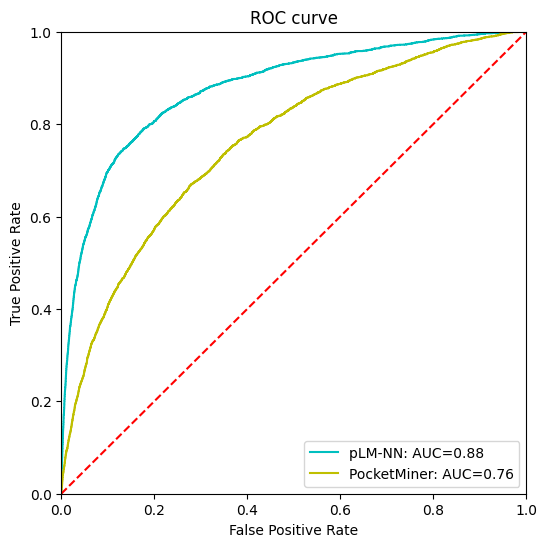

In [11]:
# make the plot square, not rectangle
plt.figure(figsize=(6,6))

# compute ROC curve for NN
y = np.array([])
actual = np.array([])
for filename in os.listdir(NN_PREDICTIONS_DIRECTORY):
    if not os.path.exists(f"{POCKETMINER_PREDICTIONS_DIRECTORY}/{filename}"):
        continue
    with open(f"{NN_PREDICTIONS_DIRECTORY}/{filename}") as f:
        actual_values = []
        predictions = []

        for row in f:
            actual_values.append(float(row.split(' ')[0]))
            predictions.append(float(row.split(' ')[1]))
        y = np.append(y, predictions, axis=0)
        actual = np.append(actual, actual_values, axis=0)

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(actual, y)
roc_auc = metrics.auc(fpr, tpr)

prefix = f'pLM-NN: AUC={roc_auc:.2f}'
color = 'c'

plt.plot(fpr, tpr, label=prefix, color=color)


# plot P2Rank results
# fpr, tpr, threshold = metrics.roc_curve(actual_values_p2rank, result_scores_p2rank)
# roc_auc = metrics.auc(fpr, tpr)
# 
# prefix = f'P2Rank: AUC={roc_auc:.2f}'
# color = 'm'
# plt.plot(fpr, tpr, label=prefix, color=color)
# 


# compute ROC curve for PocketMiner
prefix = 'PocketMiner'
color = 'y'

y = np.array([])
actual = np.array([])
results = read_predictions()
for key, result in results.items():
    print(result.actual_values)
    print(result.predictions_for_auc)
    y = np.append(y, result.predictions_for_auc, axis=0)
    actual = np.append(actual, result.actual_values, axis=0)
fpr, tpr, threshold = metrics.roc_curve(actual, y)
roc_auc = metrics.auc(fpr, tpr)

prefix = f'PocketMiner: AUC={roc_auc:.2f}'
color = 'y'
plt.plot(fpr, tpr, label=prefix, color=color)

# plot everything
plt.title('ROC curve')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
 

# PRC curve

4x19M-O-P
5ighA
1se8A
5yj2C
1fd4G-H
3bjpA
5aonA-B
4fkmB
2phzA
3mwgB
3t8bA
1fe6A-D
4dncB
2dfpA
7nbcAAA-CCC
5acvB
5wm9B-C
3la7A-B
3bk9E-H
2czdA-B
3ve9A-B
5ujpA-B
7np0A-B
1tmiA-B
3hrmA-B
4bg8A
1h13A
2nt1A-B
2xdoA-C
3b1oA-B
4jaxF
5h8kI-J
3kjrA-B
8gxjB-C
2idjA-B
2vqzF
3uyiA
5m7rA-B
4z0yB-D-F-H
2zcgA-B
5n49A-B
8hc1D-H
2vyrA
3lnzC-O
1xxoA-B
8h49A-B
6syhA-B
1x2gC
1g1mA-B
7c48A
3pfpA-B
5dy9H-I
7qzrD
4p32A-B
1k47D
2huwA-B
5gmcA-B
1r3mA-B
3x0xE-G
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

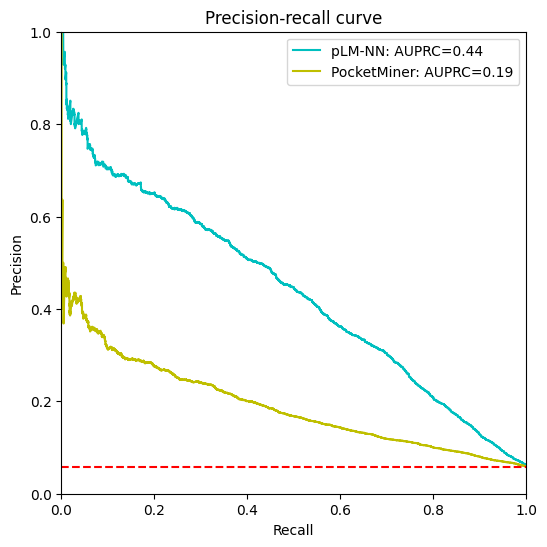

In [12]:
plt.figure(figsize=(6,6))

y = np.array([])
actual = np.array([])
for filename in os.listdir(NN_PREDICTIONS_DIRECTORY):
    if not os.path.exists(f"{POCKETMINER_PREDICTIONS_DIRECTORY}/{filename}"):
        continue
    with open(f"{NN_PREDICTIONS_DIRECTORY}/{filename}") as f:
        actual_values = []
        predictions = []

        for row in f:
            actual_values.append(float(row.split(' ')[0]))
            predictions.append(float(row.split(' ')[1]))
        y = np.append(y, predictions, axis=0)
        actual = np.append(actual, actual_values, axis=0)

precision, recall, _ = metrics.precision_recall_curve(actual, y)
roc_auc = metrics.auc(recall, precision)
color = 'c'

plt.plot(recall, precision, color=color, label=f'pLM-NN: AUPRC={roc_auc:.2f}')

y = np.array([])
actual = np.array([])
results = read_predictions()
for key, result in results.items():
    y = np.append(y, result.predictions_for_auc, axis=0)
    actual = np.append(actual, result.actual_values, axis=0)
precision, recall, _ = metrics.precision_recall_curve(actual, y)
roc_auc = metrics.auc(recall, precision)
color = 'y'

plt.plot(recall, precision, color=color, label=f'PocketMiner: AUPRC={roc_auc:.2f}')
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-recall curve")
plt.legend(loc = 'upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])

# baseline
no_skill = len(actual[actual==1]) / len(actual)
plt.plot([0, 1], [no_skill, no_skill], 'r--', label='baseline')

